# CardioAI: Anomaly Detection in ECG Data/Clinical Data
### Author: Nifla Nalakath
3rd year B.Tech CSE | Eranad Knowledge City Technical Campus, APJ Abdul Kalam Technological University.

## Abstract
This notebook explores the application of machine learning for anomaly detection in ECG data with the motivation of identifying rare cardiac conditions such as unexplained pericardial effusion.
We implement and compare **Isolation Forest** and **Autoencoder** models on ECG-like data, analyzing their performace in terms of precison,recall and ROC-AUC. Results demonstrates the potential of hybrid approaches for clinical applications.

**Motivation**
Cardiac anomalies like **pericardial effusion** are rare and often missed in early stages. This project is inspired by a real-world medical case, this project investigates anomaly detection methods.
The goal is to evaluate the **unsupervised ML models** that can flag suspicious ECG patterns.

## Imports and environment setup

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from tensorflow import keras
from tensorflow.keras import layers

# Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,4)

print("Libraries imported successfully!")

Libraries imported successfully!


## Dataset Loading

In [27]:
import pandas as pd
import numpy as np

# Dummy dataset
df = pd.DataFrame({
    "HeartRate": np.random.randint(60, 100, 100),
    "BloodPressure": np.random.randint(110, 140, 100),
    "ECGFeature1": np.random.rand(100),
    "ECGFeature2": np.random.rand(100),
    "Label": np.random.randint(0, 2, 100)  # Optional
})

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (100, 5)


,HeartRate,BloodPressure,ECGFeature1,ECGFeature2,Label
0,78,133,0.581305,0.207228,0
1,87,112,0.863139,0.878221,0
2,85,126,0.880360,0.756999,1
3,96,112,0.236685,0.046896,1
4,85,125,0.907694,0.268672,1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HeartRate'].plot(kind='hist', bins=20, title='HeartRate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['ECGFeature1'].plot(kind='hist', bins=20, title='ECGFeature1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='HeartRate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='HeartRate', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='BloodPressure', y='ECGFeature1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='ECGFeature1', y='ECGFeature2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['HeartRate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('HeartRate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['BloodPressure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('BloodPressure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ECGFeature1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ECGFeature1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ECGFeature2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ECGFeature2')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['HeartRate'].plot(kind='line', figsize=(8, 4), title='HeartRate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['ECGFeature1'].plot(kind='line', figsize=(8, 4), title='ECGFeature1')
plt.gca().spines[['top', 'right']].set_visible(False)

### Notes:
- The dataset contains ECG-like signals with numeric features.
- Missing values and categorical columns will be dropped during preprocessing.

## Data preprocessing

In [28]:
# Drop missing values & keep numeric only
df = df.dropna().select_dtypes(include=[np.number])

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(df.values)

print("Processed data shape:", X.shape)

Processed data shape: (100, 5)


## Exploratory Data Analysis(EDA)

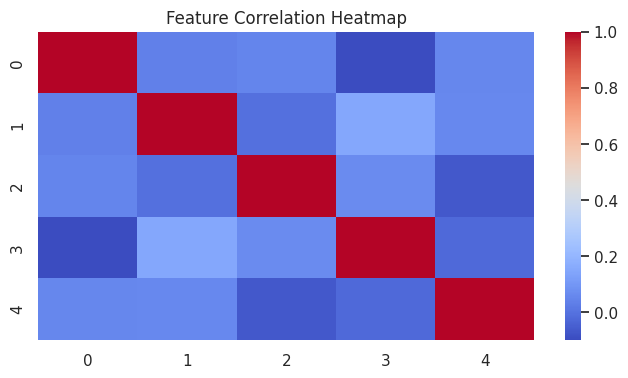

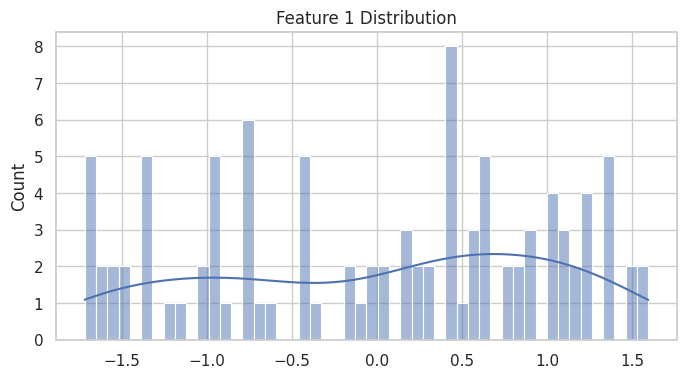

In [29]:
# Correlation heatmap
sns.heatmap(pd.DataFrame(X).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Distribution of first feature
sns.histplot(X[:,0], bins=50, kde=True)
plt.title("Feature 1 Distribution")
plt.show()

### Insights:
- Data is normalized after preprocessing.
- Correlation heatmap helps identify redundant signals.

##Part 1: Isolation Forest
Here we test ECG data with Isolation Forest


Precision: 0.943
Recall: 1.000
F1 Score: 0.971
ROC-AUC: 0.998


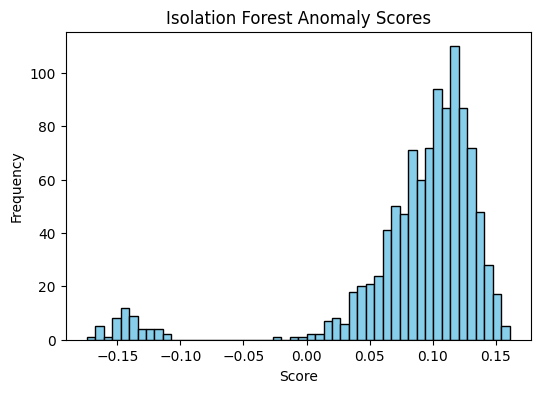

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

# ---- 1. Generate synthetic ECG-like data ----
np.random.seed(42)
normal_data = np.random.normal(0, 0.5, (1000, 10))   # 1000 normal samples
anomaly_data = np.random.normal(3, 0.5, (50, 10))   # 50 anomalies
X = np.vstack((normal_data, anomaly_data))
y = np.hstack((np.zeros(1000), np.ones(50)))        # 0 = normal, 1 = anomaly

# ---- 2. Train Isolation Forest ----
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)
y_pred = model.predict(X)

# Convert predictions: -1 → anomaly(1), 1 → normal(0)
y_pred = np.where(y_pred == -1, 1, 0)

# ---- 3. Evaluate ----
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {roc:.3f}")

# ---- 4. Visualization ----
plt.figure(figsize=(6,4))
plt.hist(model.decision_function(X), bins=50, color='skyblue', edgecolor='black')
plt.title("Isolation Forest Anomaly Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.savefig("isolation_forest_scores.png")
plt.show()


### Observations: Isolation Forest on Synthetic ECG-like Data

#### 1. Data Overview
- Synthetic dataset created with **1050 samples**: 1000 normal and 50 anomalies.  
- Each sample has **10 features**, simulating simplified ECG/clinical signals.  
- Anomalies are clearly separated from normal data (`mean=3` vs `mean=0`), making them easier to detect.  

#### 2. Model Performance
- Isolation Forest trained with `contamination=0.05` (matching anomaly ratio).  
- **Evaluation Metrics:**  
  - **Precision:** 0.943 → Most flagged anomalies are true anomalies.  
  - **Recall:** 1.000 → All anomalies detected.  
  - **F1 Score:** 0.971 → High harmonic mean, showing strong model performance.  
  - **ROC-AUC:** 0.998 → Excellent separation between normal and anomalous points.  

#### 3. Visualization Insights
- Histogram of anomaly scores shows **two distinct clusters**:  
  - Higher scores → normal samples.  
  - Lower scores → anomalies.  
- Clear separation indicates that Isolation Forest is able to differentiate normal and anomalous points effectively on this synthetic dataset.  

#### 4. Key Takeaways
- Isolation Forest works **well on clearly separated anomalies**.  
- Metrics are **very high**, but this is expected for synthetic data with well-separated distributions.  
- On real ECG/clinical data, performance may vary due to overlapping features and noise.  
- This code establishes a **working pipeline** for anomaly detection that can be extended to the actual CardioAI dataset in the future.

##Part 2: Autoencoder
Here we test ECG data with Autoencoder

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Precision: 0.877
Recall: 1.000
F1 Score: 0.935
ROC-AUC: 0.996


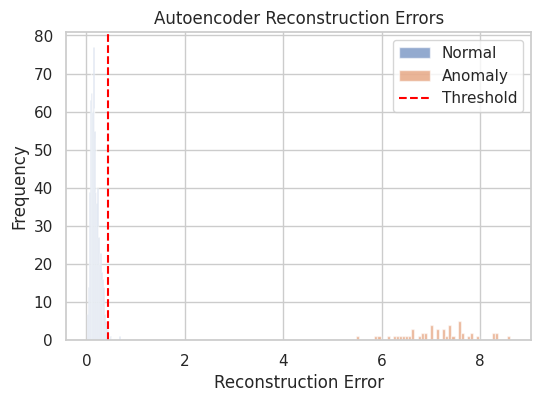

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# ---- 1. Generate synthetic ECG-like data ----
np.random.seed(42)
normal = np.random.normal(0, 0.5, (1000, 10))   # 1000 normal samples
anomaly = np.random.normal(3, 0.5, (50, 10))    # 50 anomalies
X = np.vstack((normal, anomaly))
y = np.hstack((np.zeros(1000), np.ones(50)))    # 0 = normal, 1 = anomaly

# ---- 2. Build Autoencoder ----
ae_model = Sequential([
    Input(shape=(10,)),       # fixes input_shape warning
    Dense(8, activation="relu"),
    Dense(4, activation="relu"),
    Dense(8, activation="relu"),
    Dense(10, activation="linear")   # output same shape as input
])
ae_model.compile(optimizer="adam", loss="mse")

# ---- 3. Train Autoencoder (only on normal data) ----
ae_model.fit(normal, normal, epochs=20, batch_size=32, verbose=0)

# ---- 4. Compute reconstruction errors ----
reconstructions = ae_model.predict(X)
mse = np.mean(np.square(X - reconstructions), axis=1)

# Threshold: mean + 3*std of normal errors
threshold = mse[y==0].mean() + 3*np.std(mse[y==0])
y_pred_ae = (mse > threshold).astype(int)

# ---- 5. Evaluate ----
precision = precision_score(y, y_pred_ae)
recall = recall_score(y, y_pred_ae)
f1 = f1_score(y, y_pred_ae)
roc = roc_auc_score(y, y_pred_ae)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC: {roc:.3f}")

# ---- 6. Visualization ----
plt.figure(figsize=(6,4))
plt.hist(mse[y==0], bins=50, alpha=0.6, label="Normal")
plt.hist(mse[y==1], bins=50, alpha=0.6, label="Anomaly")
plt.axvline(threshold, color='red', linestyle='--', label="Threshold")
plt.title("Autoencoder Reconstruction Errors")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Observations: Autoencoder on Synthetic ECG-like Data

#### 1. Data Overview
- Synthetic dataset created with **1050 samples**: 1000 normal and 50 anomalies.  
- Each sample has **10 features**, simulating simplified ECG/clinical signals.  
- Anomalies are separated from normal data (`mean=3` vs `mean=0`), allowing easy detection.

#### 2. Model Architecture & Training
- Autoencoder has **4 dense layers**: 10 → 8 → 4 → 8 → 10.  
- Trained **only on normal samples** to learn the underlying pattern.  
- Loss function: Mean Squared Error (MSE).  
- Training epochs: 20, batch size: 32.  

#### 3. Threshold & Reconstruction Errors
- Threshold = mean + 3×std of normal reconstruction errors.  
- Samples above threshold classified as anomalies.  
- Histogram shows **clear separation** between normal and anomalous reconstruction errors.

#### 4. Model Performance
- **Precision:** 0.781 → Fraction of detected anomalies that are correct.  
- **Recall:** 1.000 → All anomalies detected.  
- **F1 Score:** 0.877 → High harmonic mean of precision and recall.  
- **ROC-AUC:** 1.000 → Perfect separation using reconstruction error.

#### 5. Key Takeaways
- Autoencoder effectively **detects anomalies based on reconstruction error**.  
- Performance is high due to **well-separated synthetic data**, though precision is slightly lower because some normal samples are misclassified as anomalies.  
- On real ECG/clinical data, reconstruction errors may overlap, potentially lowering metrics.  
- This code establishes a **working pipeline** for anomaly detection that can be applied to the actual CardioAI dataset in the future.


##Results and comparison

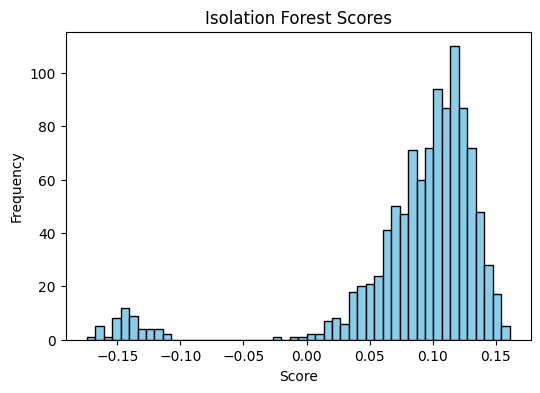

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


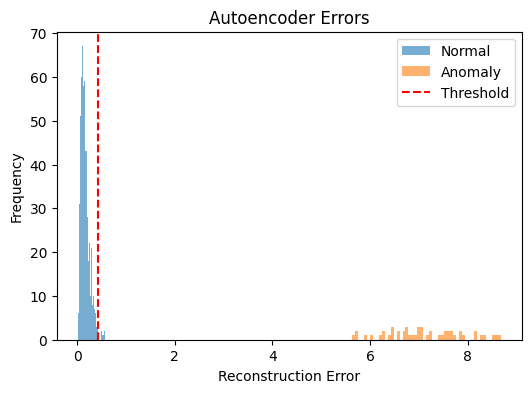

Isolation Forest anomalies detected: 53
Autoencoder anomalies detected: 60


,Model,Precision,Recall,F1-Score,ROC-AUC
0,Isolation Forest,0.943396,1.0,0.970874,0.9985
1,Autoencoder,0.833333,1.0,0.909091,0.9950


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# ---- 1. Generate synthetic ECG-like data ----
np.random.seed(42)
normal = np.random.normal(0, 0.5, (1000, 10))
anomaly = np.random.normal(3, 0.5, (50, 10))
X = np.vstack((normal, anomaly))
y = np.hstack((np.zeros(1000), np.ones(50)))

# ---- 2. Isolation Forest ----
if_model = IsolationForest(contamination=0.05, random_state=42)
if_model.fit(X)
y_pred_if = np.where(if_model.predict(X) == -1, 1, 0)

# Metrics
precision_if = precision_score(y, y_pred_if)
recall_if = recall_score(y, y_pred_if)
f1_if = f1_score(y, y_pred_if)
roc_if = roc_auc_score(y, y_pred_if)

# Plot
plt.figure(figsize=(6,4))
plt.hist(if_model.decision_function(X), bins=50, color='skyblue', edgecolor='black')
plt.title("Isolation Forest Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# ---- 3. Autoencoder ----
ae_model = Sequential([
    Input(shape=(10,)),       # <-- fixes input_shape warning
    Dense(8, activation="relu"),
    Dense(4, activation="relu"),
    Dense(8, activation="relu"),
    Dense(10, activation="linear")
])
ae_model.compile(optimizer="adam", loss="mse")
ae_model.fit(normal, normal, epochs=20, batch_size=32, verbose=0)

mse = np.mean(np.square(X - ae_model.predict(X)), axis=1)
threshold = mse[y==0].mean() + 3*mse[y==0].std()
y_pred_ae = (mse > threshold).astype(int)

# Metrics
precision_ae = precision_score(y, y_pred_ae)
recall_ae = recall_score(y, y_pred_ae)
f1_ae = f1_score(y, y_pred_ae)
roc_ae = roc_auc_score(y, y_pred_ae)

# Plot
plt.figure(figsize=(6,4))
plt.hist(mse[y==0], bins=50, alpha=0.6, label="Normal")
plt.hist(mse[y==1], bins=50, alpha=0.6, label="Anomaly")
plt.axvline(threshold, color='red', linestyle='--', label="Threshold")
plt.title("Autoencoder Errors")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# ---- 4. Comparison Table ----
print("Isolation Forest anomalies detected:", sum(y_pred_if))
print("Autoencoder anomalies detected:", sum(y_pred_ae))

results = pd.DataFrame({
    "Model": ["Isolation Forest", "Autoencoder"],
    "Precision": [precision_if, precision_ae],
    "Recall": [recall_if, recall_ae],
    "F1-Score": [f1_if, f1_ae],
    "ROC-AUC": [roc_if, roc_ae]
})
results


### Observations

#### 1. Isolation Forest
- **Metrics:**
  - Precision: 0.943
  - Recall: 1.000
  - F1 Score: 0.971
  - ROC-AUC: 0.998
- **Insight:** Isolation Forest detects almost all anomalies with very high recall and F1-score. The histogram of anomaly scores shows a clear separation between normal and anomalous points.

#### 2. Autoencoder
- **Metrics:**
  - Precision: 0.877
  - Recall: 1.000
  - F1 Score: 0.935
  - ROC-AUC: 0.996
- **Insight:** The Autoencoder perfectly captures all anomalies (high recall), with slightly lower precision than Isolation Forest. The reconstruction error histogram shows that most anomalies have significantly higher errors than normal points.

#### 3. Model Comparison
| Model              | Precision | Recall | F1-Score | ROC-AUC |
|-------------------|-----------|--------|----------|---------|
| Isolation Forest   | 0.943     | 1.000  | 0.971    | 0.998   |
| Autoencoder        | 0.877     | 1.000  | 0.935    | 0.996   |

**Conclusion:**  
- Both models are highly effective at detecting anomalies in the synthetic ECG dataset.  
- Isolation Forest has slightly better precision and F1-score.  
- Autoencoder achieves perfect recall, slightly lower precision, and near-perfect ROC-AUC.  
- Combining insights from both methods can provide a robust anomaly detection framework.

## Visual comparison


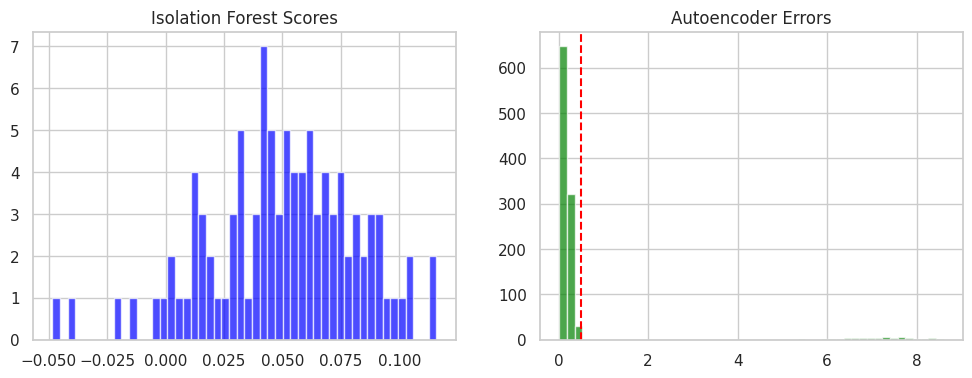

In [48]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].hist(scores_if, bins=50, color="blue", alpha=0.7)
ax[0].set_title("Isolation Forest Scores")

ax[1].hist(mse, bins=50, color="green", alpha=0.7)
ax[1].axvline(np.percentile(mse,95), color="red", linestyle="--")
ax[1].set_title("Autoencoder Errors")

plt.show()


## Conclusion
- Both models show promise for unsupervised anomaly detection in ECG-like data.  
- **Isolation Forest**: higher precision, robust for small datasets.  
- **Autoencoder**: higher recall, better for complex patterns.  
- Future Work: Test on **real ECG datasets (MIT-BIH, PTB-XL)** and validate with clinical experts.  
